
<a href='https://huntsman.usu.edu/directory/jahangiry-pedram'> <img src="logo.jpg" /></a>
___
## Pedram Jahangiry

# Time series with Pandas in Python

In this section we are going to learn how to handle time series data in Python:

Basic topics to be covered:

* datetime module
* numpy datetime arrays
* pandas datetime
* pandas datareader
    1. Resampling
    2. Time shifting (leads and lags)
    3. Rolling windows and Expanding windows
   

#### datetime module

In [1]:
from datetime import datetime

In [2]:
year =2021
month= 1
day =1

In [3]:
my_date = datetime(year, month, day)
my_date

datetime.datetime(2021, 1, 1, 0, 0)

In [4]:
# we can extract any information from our datetime object. 
my_date.month

1

In [5]:
my_date.isoweekday()
# Monday == 1 ... Sunday == 7 so 5 means Friday

5

#### Numpy datetime arrays
NumPy handles dates more efficiently than Python's datetime format.
The NumPy data type is called datetime64 to distinguish it from Python's datetime.


In [6]:
import numpy as np

In [7]:
# creating datetime array
np.array(['2020-01-20', '2021-01-20'], dtype='datetime64')

array(['2020-01-20', '2021-01-20'], dtype='datetime64[D]')

In [8]:
np.array(['2020-01-20', '2021-01-20'], dtype='datetime64[Y]')

array(['2020', '2021'], dtype='datetime64[Y]')

In [9]:
# np.arange(start, stop, step)
np.arange('2021-01-01', '2021-01-10', dtype='datetime64[D]')

array(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
       '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
       '2021-01-09'], dtype='datetime64[D]')

#### Pandas datetime
Usually we will work with time series as a datetime index in pandas dataframes. pandas has a lot of built in functions and methods to work with time series!

In [10]:
import pandas as pd

In [11]:
# let's creat an index first. For example the first week of 2021
index = pd.date_range('2020-01-01', periods=7, freq='D')
index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

here is a list of frequency parameters: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [12]:
# if you want to create an index for specific days, there are two ways to do that:
custom_index = pd.to_datetime(['2021-01-06', '2021-01-21'])
custom_index

DatetimeIndex(['2021-01-06', '2021-01-21'], dtype='datetime64[ns]', freq=None)

In [13]:
# or alternatively, we could pass a numpy array to pd.DatetimeIndex()
custom_index = pd.DatetimeIndex(np.array(['2021-01-01', '2021-01-19']))
custom_index 

DatetimeIndex(['2021-01-01', '2021-01-19'], dtype='datetime64[ns]', freq=None)

Now let's explore some of pandas datetime functions:

In [14]:
# creating a time series data frame
# pd.DateFrame( data, index, column names)
df = pd.DataFrame(['first day of the year', 'first day of school'], custom_index, ['Event'])
df

,Event
2021-01-01,first day of the year
2021-01-19,first day of school


In [15]:
df.columns

Index(['Event'], dtype='object')

In [16]:
df.index

DatetimeIndex(['2021-01-01', '2021-01-19'], dtype='datetime64[ns]', freq=None)

In [17]:
df.index.max()

Timestamp('2021-01-19 00:00:00')

In [18]:
df.index.argmax()

1

#### Pandas datareader

In [19]:
import pandas_datareader.data as web

In [20]:
start = pd.to_datetime('2020-01-01')
end   = pd.to_datetime('today')

In [21]:
Ticker =  "TSLA AAPL".split(" ")
Ticker

['TSLA', 'AAPL']

In [22]:
Stocks = web.DataReader(name= Ticker, data_source= 'yahoo', start=start, end= end)
Stocks.tail()

Attributes        High                     Low                    Open  \
Symbols           AAPL        TSLA        AAPL        TSLA        AAPL   
Date                                                                     
2021-01-12  129.690002  868.000000  126.860001  827.340027  128.500000   
2021-01-13  131.449997  860.469971  128.490005  832.000000  128.759995   
2021-01-14  131.000000  863.000000  128.759995  838.750000  130.800003   
2021-01-15  130.220001  859.900024  127.000000  819.099976  128.779999   
2021-01-19  128.710007  849.030029  126.938004  833.000000  127.779999   

Attributes                   Close                   Volume              \
Symbols           TSLA        AAPL        TSLA         AAPL        TSLA   
Date                                                                      
2021-01-12  831.000000  128.800003  849.440002   91951100.0  46270700.0   
2021-01-13  852.760010  130.889999  854.409973   88636800.0  33312500.0   
2021-01-14  843.390015  128.910004  845.000000   90221800.0  31266300.0   
2021-01-15  852.000000  127.139999  826.159973  111235300.0  38647900.0   
2021-01-19  837.799988  127.830002  844.549988   85222175.0  25366980.0   

Attributes   Adj Close              
Symbols           AAPL        TSLA  
Date                                
2021-01-12  128.800003  849.440002  
2021-01-13  130.889999  854.409973  
2021-01-14  128.910004  845.000000  
2021-01-15  127.139999  826.159973  
2021-01-19  127.830002  844.549988

In [23]:
df= round(Stocks['Adj Close'],2)
df.tail()

Symbols,AAPL,TSLA
Date,,
2021-01-12,128.80,849.44
2021-01-13,130.89,854.41
2021-01-14,128.91,845.00
2021-01-15,127.14,826.16
2021-01-19,127.83,844.55


In [24]:
import matplotlib.pyplot as plt

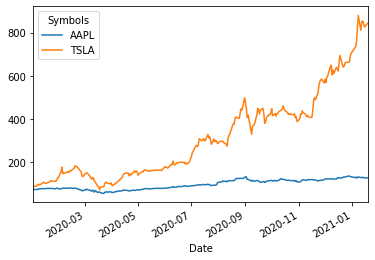

In [25]:
df.plot()

plt.show()

In [26]:
df.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-11', '2021-01-12', '2021-01-13', '2021-01-14',
               '2021-01-15', '2021-01-19'],
              dtype='datetime64[ns]', name='Date', length=264, freq=None)

#### 1.Resampling
Resampling data by different rules (frequencies). Here is the list of frequencies: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [28]:
# example: resampling data by month end frequency
df.resample(rule='M').mean()

Symbols,AAPL,TSLA
Date,,
2020-01-31,77.310476,105.730952
2020-02-29,77.294737,159.489474
2020-03-31,65.204091,111.820455
2020-04-30,67.673333,132.719524
2020-05-31,77.173500,159.885000
2020-06-30,86.147273,192.708636
2020-07-31,95.230455,292.028636
2020-08-31,117.059524,360.060000
2020-09-30,114.927143,413.495238


you can resample based on custom resampling functions as well

**example 1: plot the normalized monthly average price.**

In [30]:
df.resample(rule='M').mean().apply(lambda x: x/x[0])

Symbols,AAPL,TSLA
Date,,
2020-01-31,1.000000,1.000000
2020-02-29,0.999796,1.508446
2020-03-31,0.843406,1.057594
2020-04-30,0.875345,1.255257
2020-05-31,0.998228,1.512187
2020-06-30,1.114303,1.822632
2020-07-31,1.231792,2.761998
2020-08-31,1.514148,3.405436
2020-09-30,1.486566,3.910825


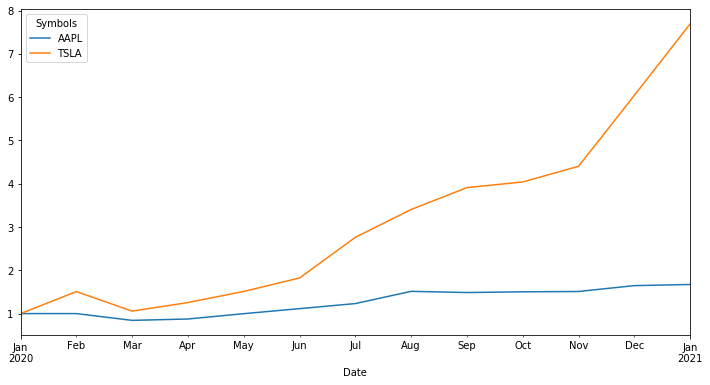

In [31]:
df.resample(rule='M').mean().apply(lambda x: x/x[0]).plot(figsize=(12,6))
plt.show()

In [32]:
# example 2: draw a barplot comparing monthly returns between Tesla and Apple

df.resample(rule='M').apply(lambda x : x[-1]/x[0]-1)

Symbols,AAPL,TSLA
Date,,
2020-01-31,0.030494,0.512028
2020-02-29,-0.112157,-0.143590
2020-03-31,-0.148976,-0.295320
2020-04-30,0.219549,0.623715
2020-05-31,0.102896,0.190646
2020-06-30,0.133450,0.202316
2020-07-31,0.167346,0.277855
2020-08-31,0.186734,0.677845
2020-09-30,-0.136917,-0.096916


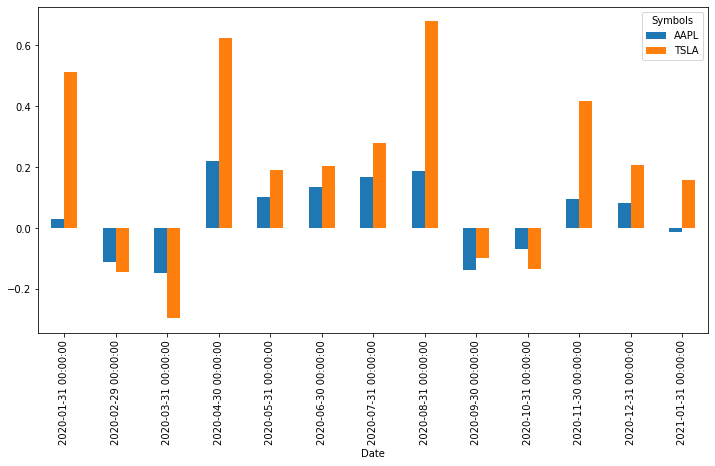

In [33]:
df.resample(rule='M').apply(lambda x : x[-1]/x[0]-1).plot.bar(figsize=(12,6))
plt.show()

#### 2. Time shifting (leads and lags)


In [34]:
# shift forward
df_apple= pd.DataFrame(df['AAPL'])
df_apple.head()

,AAPL
Date,
2020-01-02,74.44
2020-01-03,73.72
2020-01-06,74.31
2020-01-07,73.96
2020-01-08,75.15


In [35]:
df_apple['lag(t-1)']= df_apple['AAPL'].shift(1)
df_apple['lead(t+1)']= df_apple['AAPL'].shift(-1)

df_apple.head()

,AAPL,lag(t-1),lead(t+1)
Date,,,
2020-01-02,74.44,NaN,73.72
2020-01-03,73.72,74.44,74.31
2020-01-06,74.31,73.72,73.96
2020-01-07,73.96,74.31,75.15
2020-01-08,75.15,73.96,76.74


#### 3. Rolling windows and Expanding windows

Let's construct a 30 day simple moving averages for Tesla!

In [36]:
df.head()

Symbols,AAPL,TSLA
Date,,
2020-01-02,74.44,86.05
2020-01-03,73.72,88.60
2020-01-06,74.31,90.31
2020-01-07,73.96,93.81
2020-01-08,75.15,98.43


In [37]:
df.rolling(window=5).mean().head()

Symbols,AAPL,TSLA
Date,,
2020-01-02,NaN,NaN
2020-01-03,NaN,NaN
2020-01-06,NaN,NaN
2020-01-07,NaN,NaN
2020-01-08,74.316,91.44


In [39]:
df['TSLA_MA(30)']=df['TSLA'].rolling(30).mean()

In [40]:
df.head()

Symbols,AAPL,TSLA,TSLA_MA(30)
Date,,,
2020-01-02,74.44,86.05,NaN
2020-01-03,73.72,88.60,NaN
2020-01-06,74.31,90.31,NaN
2020-01-07,73.96,93.81,NaN
2020-01-08,75.15,98.43,NaN


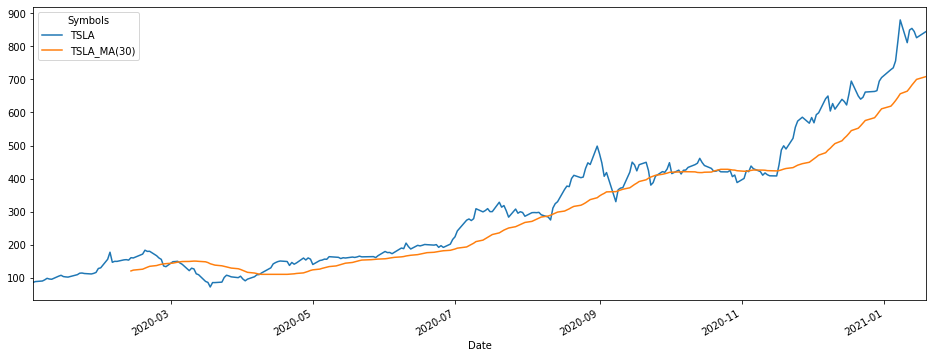

In [41]:
df[['TSLA', 'TSLA_MA(30)']].plot(figsize=(16,6))

plt.show()

Let's construct an expanding averages for AAPL!

In [42]:
df['AAPL'].head()

Date
2020-01-02    74.44
2020-01-03    73.72
2020-01-06    74.31
2020-01-07    73.96
2020-01-08    75.15
Name: AAPL, dtype: float64

In [43]:
df['AAPL'].expanding().mean().head()

Date
2020-01-02    74.440000
2020-01-03    74.080000
2020-01-06    74.156667
2020-01-07    74.107500
2020-01-08    74.316000
Name: AAPL, dtype: float64

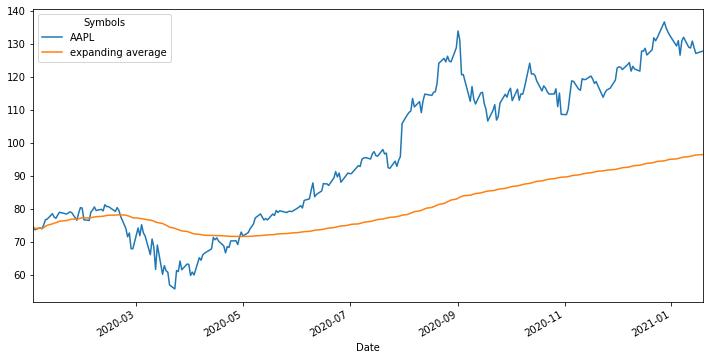

In [44]:
df['expanding average']=df['AAPL'].expanding().mean()
df[['AAPL','expanding average']].plot(figsize=(12,6))

plt.show()